<a href="https://colab.research.google.com/github/ariel-j/python-learning/blob/main/hw5_with_corrections_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions:
1. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Do not add or remove cells to the document, inside the current cells you can add helper functions if you wish.
3. Download the file and submit only one file named hw5.ipynb (Do not change file name!)
4. Work alone, you can use any resource that was presented in class!
5. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Runtime$\rightarrow$Run All).
6. Clear all outputs - Edit$\rightarrow$Clear all outputs


---

# Assignment 5: Differentiation and optimization

In [ ]:
import sympy as sym # symbolic differentiation
import jax          # algorithmic differentiation
import jax.numpy as np
import matplotlib.pyplot as plt

## Question 1: Differentiation

Function

$$f(a, b) = \frac 2 a sin(b) \exp \left( - \frac {a^2} {b^2}\right)$$

is given.

1. Derive the partial derivatives of $f(a, b)$ by $a$ and $b$.

    $$\frac {\partial f} {\partial a} = $$
    $$\frac {\partial f} {\partial b} = $$

Implement the function f_partial_derviatives:

<pre>
Input parameters:
a - first symbol
b - second symbol
return value - a tuple (dfa, dfb) such that dfa is the partial derivatives of f by a,
               and dfb is the partial derivative of f by b
</pre>

In [ ]:
def f_partial_derviatives_symbol(a, b):
    f = (2 / a )* sym.sin(b) * sym.exp(-(a**2 / b**2))
    dfa = sym.diff(f, a)
    dfb = sym.diff(f, b)
    return dfa, dfb

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.1 --- Test your implementation:
# ---------------------------
print("Testing the implementation of the 'f_partial_derviatives_symbol' function..\n ")
a=sym.Symbol('a')
b=sym.Symbol('b')
f_deriv_a, f_deriv_b = f_partial_derviatives_symbol(a, b)
assert isinstance(f_deriv_a, sym.Basic)
assert isinstance(f_deriv_b, sym.Basic)
print ("good job!\nSanity tests passed. There are additional hidden tests...")
print(f"Dervative with respect to a is: {f_deriv_a}")
print(f"Dervative with respect to b is: {f_deriv_b}")


Testing the implementation of the 'f_partial_derviatives_symbol' function..
 
good job!
Sanity tests passed. There are additional hidden tests...
Dervative with respect to a is: -4*exp(-a**2/b**2)*sin(b)/b**2 - 2*exp(-a**2/b**2)*sin(b)/a**2
Dervative with respect to b is: 4*a*exp(-a**2/b**2)*sin(b)/b**3 + 2*exp(-a**2/b**2)*cos(b)/a


2. Derive the same derivatives by a and b, but using using algorithmic differentiation this time (with `jax`).

Implement the function f, and f_partial_derviatives_algo:

<pre>
f:
Input parameters:
a,b - point (a,b)
return value - the output of the equation of Question 1

f_partial_derviatives_algo:
Input parameters:
f - a function
a,b - point(a,b)
return value - a tuple (dfa, dfb) such that dfa is the partial derivatives of f by a,
               and dfb is the partial derivative of f by b
</pre>

In [ ]:
def f(a, b):
    return  (2 / a)* np.sin(b) * np.exp(-(a**2 / b**2))

def f_partial_derviatives_algo(f, a ,b):
  df_a = jax.grad(f,argnums=(0))
  df_b = jax.grad(f,argnums=(1))
  return df_a, df_b

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.2 --- Test your implementation:
# ---------------------------
print("Testing the implementation of the 'f_partial_derviatives_algo' function..\n ")
a=1.
b=1.
f_deriv_a, f_deriv_b = f_partial_derviatives_algo(f, a, b)
assert callable(f_deriv_a)
assert callable(f_deriv_b)
assert f_deriv_a(a, b) < 0
assert f_deriv_b(a, b) > 0
print ("good job!\nSanity tests passed. There are additional hidden tests...")
print(f"Dervative with respect to a is: {f_deriv_a(a,b)}")
print(f"Dervative with respect to b is: {f_deriv_b(a,b)}")


Testing the implementation of the 'f_partial_derviatives_algo' function..
 


good job!
Sanity tests passed. There are additional hidden tests...
Dervative with respect to a is: -1.8573592901229858
Dervative with respect to b is: 1.6357717514038086


3. Plot the following:

a. One subplot for both:

  * $f(a, 10)$, $\frac {\partial f(a, 10)} {\partial a}$ for range $a \in [-20, 20]$,

b. A seperate subplot below the first subplot for:

  * $f(10, b)$, $\frac {\partial f(10, b)} {\partial b}$ for range $b \in [1, 100]$.


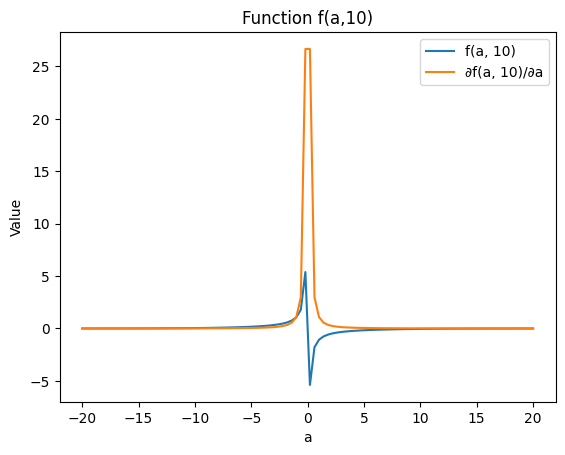

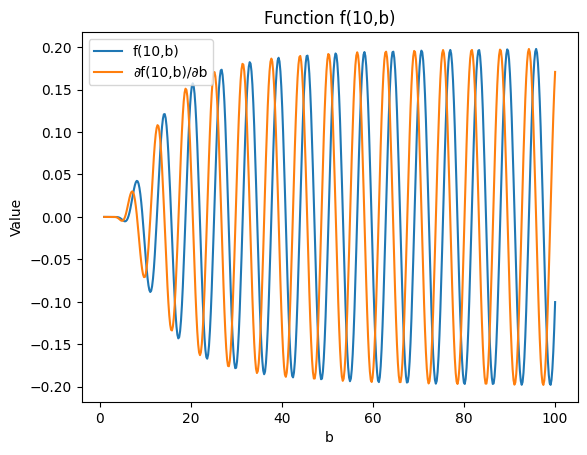

In [ ]:
a = np.linspace(-20,20,100)
b = np.linspace(1,100,500)
df_da, df_db = f_partial_derviatives_algo(f,a,b)


#1
plt.plot(a, [f(a,10) for a in a], label="f(a, 10)")
plt.plot(a, [df_da(a,10) for a in a], label="∂f(a, 10)/∂a")
plt.xlabel("a")
plt.ylabel("Value")
plt.title("Function f(a,10)")
plt.legend()
plt.show()


#2
plt.plot(b, [f(10,b) for b in b], label="f(10,b)")
plt.plot(b, [df_db(10,b) for b in b], label="∂f(10,b)/∂b")
plt.xlabel("b")
plt.ylabel("Value")
plt.title("Function f(10,b)")
plt.legend()
plt.show()

4. Implement a function for approximate numerical differentiation, given the difference size $h$.

Implement the function f_partial_derviatives_numeric_at_a_b:

<pre>
Input parameters:
f - function f
a - first parameter of f
b - second parameter of f
h - the change of the variable to approximate the derivative by
return value - a tuple that contains partial derivatives of f by a and b approximated at (a,b)
</pre>

In [ ]:
def f_partial_derviatives_numeric_at_a_b(f, a, b, h):
    dfa = (f(a + h, b) - f(a-h, b)) / (2*h)
    dfb = (f(a,b + h) - f(a,b - h)) / (2*h)
    return dfa, dfb

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.4 --- Test your implementation:
# ---------------------------
print("Testing the implementation of the 'f_partial_derviatives_numeric' function..\n ")
a=1.
b=1.
f_deriv_a_at_a_b, f_deriv_b_at_a_b = f_partial_derviatives_numeric_at_a_b(f, a, b, 1e-6)
assert f_deriv_a_at_a_b < 0
assert f_deriv_b_at_a_b > 0
print ("good job!\nSanity tests passed. There are additional hidden tests...")


Testing the implementation of the 'f_partial_derviatives_numeric' function..
 
good job!
Sanity tests passed. There are additional hidden tests...


5. Find the best difference size $h$ for differentiating
   * $f(a, b)$ by $a$.
   * $f(a, b)$ by $b$.

The best difference size minimizes the absolute error of numerical differentiation relative to the exact differentiation.

Implement the function f_deriv_by_a_optimize_h:

<pre>
Input parameters:
a - first parameter of f
b - second parameter of f
return value - the absoltue difference between the vaule of the derivative using the best difference h to do numeric differentiation of f(a,b) by a and the algorithmic derivative by a
</pre>

Implement the function f_deriv_by_b_optimize_h:

<pre>
Input parameters:
a - first parameter of f
b - second parameter of f
return value - the absoltue difference between the vaule of the derivative using the best difference h to do numeric differentiation of f(a,b) by b and the algorithmic derivative by b
</pre>

Non-Mandatory: draw plots of the abolute error by h
(it's a good practice for you to validate that the results make sense)

* Allowed relative tolerance is up to 100 (so if best h=1e-04, any value between 1e-02 and 1e-06 is allowed)

In [ ]:
def f_deriv_by_a_optimize_h(a, b):
    partial_a, _ = f_partial_derviatives_algo(f, a, b)
    h_values = np.logspace(-10, -1, num=100)
    errors = []

    for h in h_values:
      partial_ah, _ = f_partial_derviatives_numeric_at_a_b(f, a, b, h)
      errors.append(np.abs(partial_ah - partial_a(a, b)))

    errors = np.array(errors)

    plt.plot(h_values, errors)
    plt.xlabel('Difference Size (h)')
    plt.ylabel('Absolute Error')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Absolute Error of Numerical Differentiation (with respect to a)')
    plt.show()

    best_h_index = np.argmin(errors)
    best_h = h_values[best_h_index]
    best_error = errors[best_h_index]

    print(best_error)
    return best_error


In [ ]:
def f_deriv_by_b_optimize_h(a, b):
    _, partial_b = f_partial_derviatives_algo(f, a, b)
    h_values = np.logspace(-10, -1, num=100)  # Range of h values to try
    errors = []

    for h in h_values:
      _, partial_bh= f_partial_derviatives_numeric_at_a_b(f, a, b, h)
      errors.append(np.abs(partial_bh - partial_b(a, b)))

    errors = np.array(errors)

    plt.plot(h_values, errors)
    plt.xlabel('Difference Size (h)')
    plt.ylabel('Absolute Error')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Absolute Error of Numerical Differentiation (with respect to b)')
    plt.show()

    best_h_index = np.argmin(errors)
    best_h = h_values[best_h_index]
    best_error = errors[best_h_index]

    print(best_error)
    return best_error

Testing the implementation of the 'f_partial_derviatives_numeric' function..
 


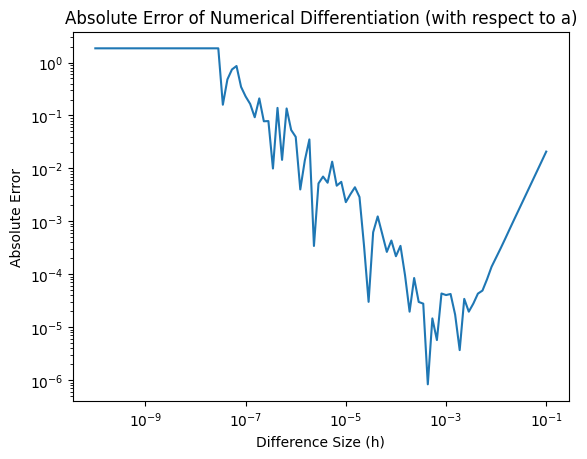

8.34465e-07


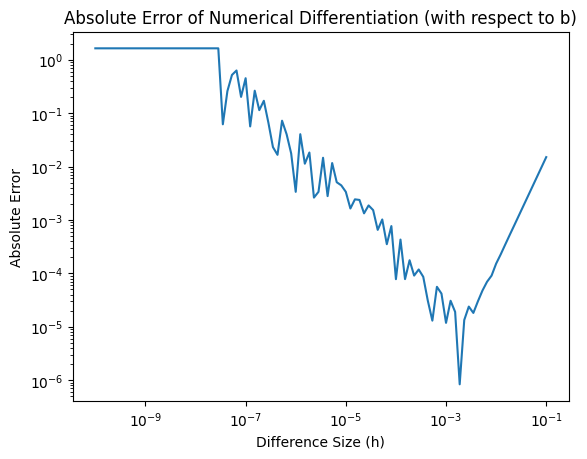

8.34465e-07
good job!
Sanity tests passed. There are additional hidden tests...


In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.5 --- Test your implementation:
# ---------------------------
print("Testing the implementation of the 'f_partial_derviatives_numeric' function..\n ")
assert f_deriv_by_a_optimize_h(a,b) < 1e-04
assert f_deriv_by_b_optimize_h(a,b) < 1e-04
print ("good job!\nSanity tests passed. There are additional hidden tests...")


## Question 2: Optimization

### Logistic regression

For a trial group of rats https://en.wikipedia.org/wiki/Rat , the weight and the event of having diabetes are given as a list of pairs (weight, diabetes) (1 corresponds to diabetes):


In [ ]:
rats = [(0.47, 0), (0.23, 0), (0.86, 1), (0.22, 0), (0.21, 1),
        (0.31, 0), (0.62, 0), (0.941, 1), (0.27, 0), (0.35, 1),
        (0.18, 0), (0.13, 0), (0.31, 1), (0.99, 1), (0.85, 1),
        (0.35, 1), (0.6, 1), (0.89, 0), (0.6, 1), (0.92, 0)]

Logistic regression is a statiscal model that models the probability of an event happening. In binary logistic regression there is a single binary dependent variable coded by '0' or '1'.

We can express the data as a tuple $(x,y)=(data,outcome)=(x,0/1)$

To model the probability of event $x$, we can use the logistic function $p(x)=\frac{1}{1+e^{(\mu-x)}}$.

To find the appropiate $\mu$, that maximizes the classifaction accuracy we minimize the loss function $-\sum_{i=1}^N (y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i)))$.

----------------------------------------


We want to predict rat diabetes based on weight. The prediction function is

$$diabetes = {weight} \ge threshold.$$

The loss for this _classification_ problem is called log_loss:

\begin{equation}
\begin{aligned}
& L = -\sum_{i=1}^N (diabetes_i \log p_i + (1 - diabetes_i) \log (1 - p_i))
\end{aligned}
\end{equation}
where the predicted probability is:
\begin{equation}
\begin{aligned}
& p_i = \frac 1 {1 + \exp(threshold - weight{_i})}
\end{aligned}
\end{equation}

1. Implement the loss as a function of the threshold.

Implement the function care_bare_classification_loss:

<pre>
Input parameters:
threshold - the treshold of the classification
data - the data in the format of list of tuples
return value - the loss as defined above
</pre>

In [ ]:

def rat_classification_loss(threshold):
    rats_arr = np.array(rats)
    weights = rats_arr[:, 0]
    diabetes = rats_arr[:, 1]

    pi = 1 / (1 + np.exp(threshold - weights))
    loss = -np.sum(diabetes * np.log(pi) + (1 - diabetes) * np.log(1 - pi))

    return loss


In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.1 --- Test your implementation:
# ---------------------------
print("Testing the implementation of the 'loss' function..\n ")
assert rat_classification_loss(0.5) > 0
print ("good job!\nSanity tests passed. There are additional hidden tests...")


Testing the implementation of the 'loss' function..
 
good job!
Sanity tests passed. There are additional hidden tests...


2. Plot the loss and the derivative of the loss by the threshold in the range $threshold \in (0.01, 0.99)$

Implement a function rat_classification_loss_deriv

<pre>
Input parameters:
threshold - the treshold of the classification
return value - the derviative of the loss
</pre>


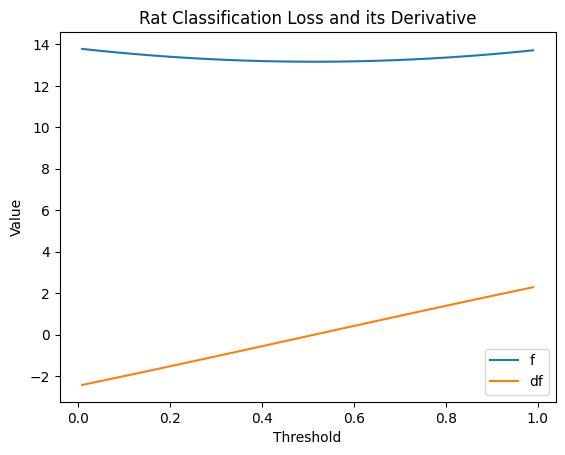

In [ ]:
def rat_classification_loss_deriv(threshold):
    deriv_loss=jax.grad(rat_classification_loss)
    return deriv_loss(threshold)

threshold_range = np.linspace(0.01, 0.99, 50)
loss_values = [rat_classification_loss(threshold) for threshold in threshold_range]
deriv_values = [rat_classification_loss_deriv(threshold) for threshold in threshold_range]
plt.plot(threshold_range, loss_values, label="f")
plt.plot(threshold_range, deriv_values, label="df")
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Rat Classification Loss and its Derivative')
plt.legend()
plt.show()

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.2 --- Test your implementation:
# ---------------------------
print("Testing the implementation of the 'loss' function..\n ")
assert rat_classification_loss_deriv(0.5) < 0
print ("good job!\nSanity tests passed. There are additional hidden tests...")


Testing the implementation of the 'loss' function..
 
good job!
Sanity tests passed. There are additional hidden tests...


3. Find the best threshold using gradient descent - use jax for the dervative!

Implement a function loss_best_threshold_gd

<pre>
return value - the best threshold according to the loss function
</pre>

In [ ]:
def loss_best_threshold_gd(f, x0=0., step=0.1, decay=0.995, niter=30):
  """approximates minimum of f starting from x0
  """
  df = jax.grad(f)
  x = x0
  for i in range(niter):
    x -= df(x)*step
    step *= decay
  return x

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.3 --- Test your implementation:
# ---------------------------
print("Testing the implementation of the 'loss' function..\n ")
best_threshold = loss_best_threshold_gd(rat_classification_loss)
print (best_threshold)
assert best_threshold > 0
print (rat_classification_loss(best_threshold))
print (rat_classification_loss(best_threshold+0.5))
assert rat_classification_loss(best_threshold) < rat_classification_loss(best_threshold+0.5)
print ("good job!\nSanity tests passed. There are additional hidden tests...")
print(f"Best threshold: best_threshold")


Testing the implementation of the 'loss' function..
 
0.51433843
13.162634
13.768714
good job!
Sanity tests passed. There are additional hidden tests...
Best threshold: best_threshold


4. Find the best threshold using Newton's method.

Implement a function loss_best_threshold_newton

<pre>
Input parameters:
f - rat_classification_loss_deriv
x0 = 0 - starting point
niter = 10 - number of iterations
return value - the best threshold according to the loss function
</pre>

In [ ]:
def newton(f, x0, niter=10):
  df = jax.grad(f)
  ddf = jax.grad(df)
  x = x0
  for i in range(niter):
    x = x - df(x)/ddf(x)
  return x


def loss_best_threshold_newton(f, x0=0., niter=10):
    df = jax.grad(f)
    ddf = jax.grad(df)

    def newton_step(x):
        return x - df(x) / ddf(x)

    x = x0
    for _ in range(niter):
        x = newton_step(x)

    return x

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.4 --- Test your implementation:
# ---------------------------
print("Testing the implementation of the 'loss' function..\n ")
best_threshold = loss_best_threshold_newton(rat_classification_loss)
assert best_threshold > 0
assert rat_classification_loss(best_threshold) < rat_classification_loss(best_threshold+0.5)
print ("good job!\nSanity tests passed. There are additional hidden tests...")


Testing the implementation of the 'loss' function..
 
good job!
Sanity tests passed. There are additional hidden tests...


5. Using the best threshold found, how many diabetes=1 cases were misclassified?

Implement a function misclassified_diabetes

<pre>
Input parameters:
data - the data in the format of list of tuples
use_newton - True if using Newton, False if using GD
return value - how many diabetes=1 cases were missclassified
</pre>


In [ ]:
def misclassified_diabetes(use_newton=False, data=rats):
    if use_newton:
        best_threshold = loss_best_threshold_newton(rat_classification_loss)
    else:
        best_threshold = loss_best_threshold_gd(rat_classification_loss)

    misclassified_count = 0
    for rat in data:
        weight = rat[0]
        diabetes = rat[1]
        predicted_diabetes = 1 if weight >= best_threshold else 0

        if diabetes == 1 and predicted_diabetes == 0:
            misclassified_count += 1

    return misclassified_count

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.5 --- Test your implementation:
# ---------------------------
print("Testing the implementation of the 'loss' function..\n ")
missclassified_diabetes_count_gd = misclassified_diabetes(False)
missclassified_diabetes_count_newton = misclassified_diabetes(True)
assert missclassified_diabetes_count_gd >= 0
assert missclassified_diabetes_count_newton >= 0
print ("good job!\nSanity tests passed. There are additional hidden tests...")
print(f"Number of missclasifications: {missclassified_diabetes_count_gd}")


Testing the implementation of the 'loss' function..
 
good job!
Sanity tests passed. There are additional hidden tests...
Number of missclasifications: 4
